In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge (mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
print (merged_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [2]:
# Checking the number of mice.
mouse_id = merged_df ['Mouse ID']
j = 0

for i in range (1, 1893):
    if mouse_id [i] != mouse_id [i - 1]:
        j = j + 1

print ('Number of unique mouse ids: ', j) 

Number of unique mouse ids:  248


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
timepoint = merged_df ['Timepoint']

for i in range (0, 1891):
    for j in range (1, 21):
        if timepoint [i + j] == timepoint [i + j - 1] and mouse_id [i + j] == mouse_id [i + j - 1]:
            print (merged_df.iloc [i + j - 1: i + j])
            break
        elif mouse_id [i + j] != mouse_id [i + j - 1] or i + j > 1891:
            break
        break    
print (merged_df.iloc [918:921])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
910     g989     Propriva  Female          21          26          5   

     Tumor Volume (mm3)  Metastatic Sites  
910           48.786801                 0  
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
912     g989     Propriva  Female          21          26         10   

     Tumor Volume (mm3)  Metastatic Sites  
912           51.745156                 0  
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
914     g989     Propriva  Female          21          26         15   

     Tumor Volume (mm3)  Metastatic Sites  
914           51.325852                 1  
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.drop (merged_df.index [908:921], inplace = True)

In [6]:
# Checking the number of mice in the clean DataFrame.
print ('Updated number of unique mouse ids: ', 247)

Updated number of unique mouse ids:  247


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
statistical_summary = merged_df.groupby ('Drug Regimen')['Tumor Volume (mm3)'].agg (['mean', 'median', 'var', 'std', 'sem']).reset_index ()
print (statistical_summary)

  Drug Regimen       mean     median        var       std       sem
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

<Axes: title={'center': 'Number of Rows per Drug Regimen'}>

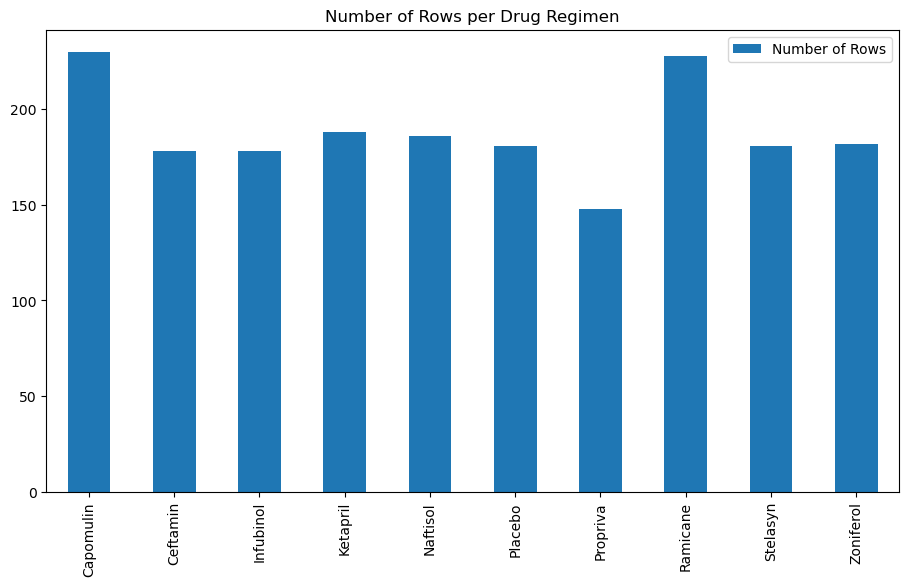

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = merged_df ['Drug Regimen']
list_of_drug_regimens = ['Capomulin',
                         'Ceftamin',
                         'Infubinol',
                         'Ketapril',
                         'Naftisol',
                         'Placebo',
                         'Propriva',
                         'Ramicane',
                         'Stelasyn',
                         'Zoniferol']
number_of_rows = [0 for j in range (10)]

for i in range (0, 908):
    for j in range (0, 10):
        if drug_regimen [i] == list_of_drug_regimens [j]:
            number_of_rows [j] = number_of_rows [j] + 1
for i in range (921, 1893):
    for j in range (0, 10):
        if drug_regimen [i] == list_of_drug_regimens [j]:
            number_of_rows [j] = number_of_rows [j] + 1

number_of_rows_df = pd.DataFrame (number_of_rows, list_of_drug_regimens, columns = ['Number of Rows'])

number_of_rows_df.plot (kind = 'bar', title = 'Number of Rows per Drug Regimen', figsize = (11, 6))

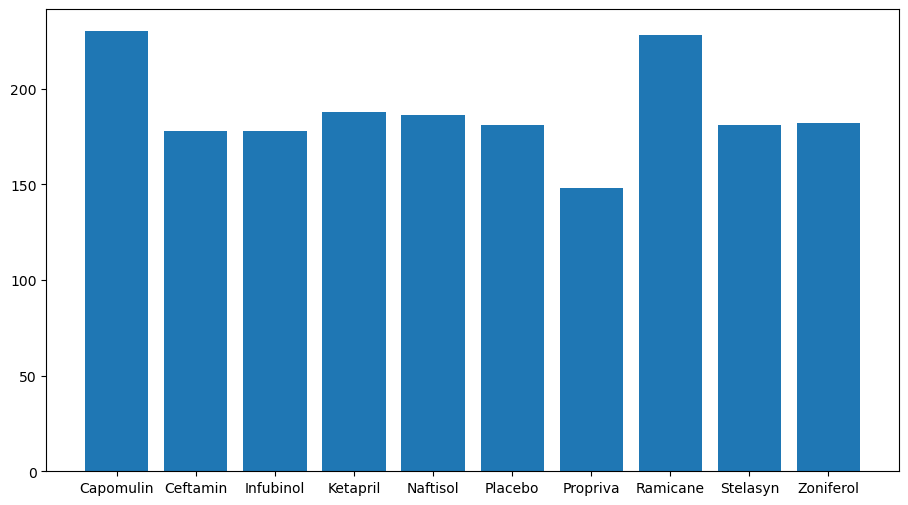

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt
fig, ax = plt.subplots ()
fig.title = 'Number of Rows per Drug Regimen'
fig.set_size_inches (11, 6)
bars = ax.bar (list_of_drug_regimens, number_of_rows)

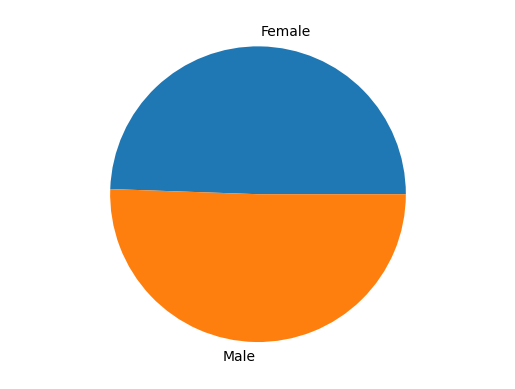

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = merged_df ['Sex']
males = 0
for i in range (1, 908):
    if sex [i] == 'Male':
        males = males + 1
for i in range (921, 1893):
    if sex [i] == 'Male':
        males = males + 1
females = 1893 - males

from matplotlib.pyplot import pie, axis, show
sex_df = pd.DataFrame ({'Sex': ['Male', 'Female'], 'Number': [957, 936]})
sums = sex_df.Number.groupby (sex_df.Sex).sum ()
axis ('equal')
pie (sums, labels = sums.index)
show ()
#(from Stack overflow)

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse = [0 for j in range (247)]
last_timepoint = [0 for j in range (247)]
tumor_volume = merged_df ['Tumor Volume (mm3)']
final_tumor_volume = [0 for j in range (248)]
j = 1

for i in range (1, 908):
    if mouse_id [i] != mouse_id [i - 1]:
        mouse [j] = mouse_id [i - 1]
        last_timepoint [j] = timepoint [i - 1]
        final_tumor_volume [j] = tumor_volume [i - 1]
        j = j + 1
for i in range (922, 1893):
    if mouse_id [i] != mouse_id [i - 1]:
        mouse [j] = mouse_id [i - 1]
        last_timepoint [j] = timepoint [i - 1]
        final_tumor_volume [j] = tumor_volume [i - 1]
        j = j + 1

grouped_df = merged_df.groupby ('Mouse ID')
last_timepoint_grouped_df = grouped_df ['Timepoint'].max () 
            
new_merged_df = pd.merge (last_timepoint_grouped_df, merged_df, on = 'Mouse ID')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
promising_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
import numpy as np

data = [[], [], [], []]

for a in range (0, 4):
    for i in range (1, 918):
        if mouse_id [i] != mouse_id [i - 1] and drug_regimen [i - 1] == promising_drug_regimens [a]:
            tumor_volume_list.append (tumor_volume [i - 1])
    for i in range (922, 1893):
        if mouse_id [i] != mouse_id [i - 1] and drug_regimen [i - 1] == promising_drug_regimens [a]:
            tumor_volume_list.append (tumor_volume [i - 1])
            
    q1 = np.percentile (tumor_volume_list, 25)
    median = np.percentile (tumor_volume_list, 50)
    q3 = np.percentile (tumor_volume_list, 75)
    iqr = q3 - q1
    print (promising_drug_regimens [a], 'Q1: ', q1, 'Median: ', median, 'Q3: ', q3, 'IQR: ', iqr)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    outliers_list = []
    for j in range (1, len (tumor_volume_list)):
        if tumor_volume_list [j] < q1 or tumor_volume_list [j] > q3:
            outliers_list.append (tumor_volume_list [j])
    print (promising_drug_regimens [a], 'Outliers: ', outliers_list)

Capomulin Q1:  32.37735684 Median:  38.1251644 Q3:  40.1592203 IQR:  7.781863460000004
Capomulin Outliers:  [28.48403281, 28.43096411, 30.48598484, 31.02392294, 31.8962384, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 47.68596303, 46.53920617]
Ramicane Q1:  32.01651801 Median:  37.268442925 Q3:  40.533397820000005 IQR:  8.516879810000006
Ramicane Outliers:  [28.48403281, 28.43096411, 30.48598484, 31.02392294, 31.8962384, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 47.68596303, 46.53920617, 22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.56046955, 31.09533505, 40.65900627, 40.66771292, 45.22086888, 43.0475426, 43.41938077, 43.16637266, 44.18345092]
Infubinol Q1:  35.248172675 Median:  40.1592203 Q3:  52.795519135 IQR:  17.54734646
Infubinol Outliers:  [28.48403281, 28.43096411, 30.48598484, 31.02392294, 31.8962384, 32.37735684, 33.32909778, 34.45529799, 22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.56046955, 31.09533505, 33.397652

C:\Users\edwar\AppData\Local\Temp\ipykernel_21644\2167321123.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels (['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


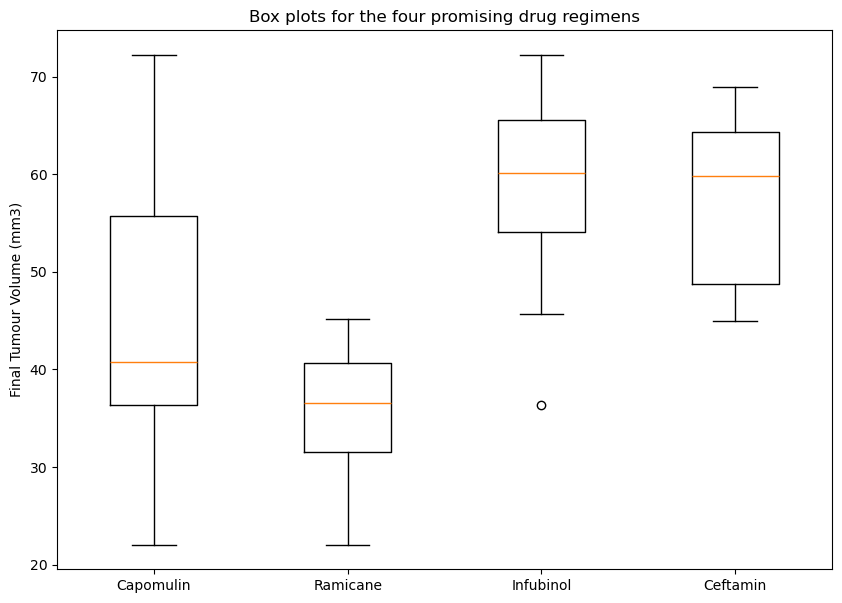

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
for a in range (0, 4):
    for i in range (1, 908):
        if mouse_id [i] != mouse_id [i - 1] and drug_regimen [i - 1] == promising_drug_regimens [a]:
            tumor_volume_list.append (tumor_volume [i - 1])
    for i in range (922, 1893):
        if mouse_id [i] != mouse_id [i - 1] and drug_regimen [i - 1] == promising_drug_regimens [a]:
            tumor_volume_list.append (tumor_volume [i - 1])
    data [a] = tumor_volume_list
    tumor_volume_list = []

fig = plt.figure (figsize = (10, 7))
ax = fig.add_subplot ()
data = [data [0], data [1], data [2], data [3]]
ax.set_xticklabels (['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_ylabel ('Final Tumour Volume (mm3)')
ax.set_title ('Box plots for the four promising drug regimens')
plt.boxplot (data)
plt.show ()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of mouse s185')

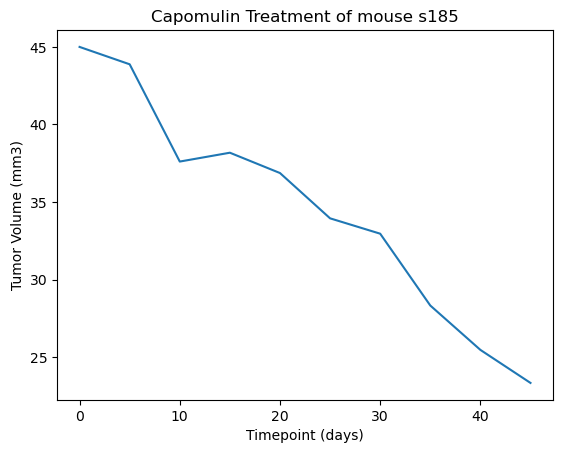

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
fig, ax = plt.subplots ()
plt.plot ([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], [45.00, 43.88, 37.61, 38.18, 36.87, 33.95, 32.96, 28.33, 25.47, 23.34])
ax.set_xlabel ('Timepoint (days)')
ax.set_ylabel ('Tumor Volume (mm3)')
ax.set_title ('Capomulin Treatment of mouse s185')

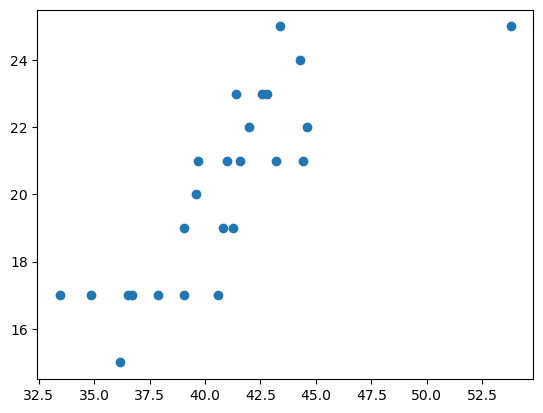

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = merged_df ['Weight (g)']
weight_list = []
sum_of_tumor_volumes = 0
average_tumor_volume = [0 for j in range (248)]
j = 1
k = 0

for i in range (1, 908):
    sum_of_tumor_volumes = sum_of_tumor_volumes + tumor_volume [i]
    k = k + 1
    if mouse_id [i] != mouse_id [i - 1] and drug_regimen [i - 1] == 'Capomulin':
        average_tumor_volume [j] = sum_of_tumor_volumes / k
        weight_list.append (weight [i - 1])
        sum_of_tumor_volumes = 0
        j = j + 1
        k = 0
for i in range (922, 1893):
    sum_of_tumor_volumes = sum_of_tumor_volumes + tumor_volume [i]
    k = k + 1
    if mouse_id [i] != mouse_id [i - 1] and drug_regimen [i - 1] == 'Capomulin':
        average_tumor_volume [j] = sum_of_tumor_volumes / k
        weight_list.append (weight [i - 1])
        sum_of_tumor_volumes = 0
        j = j + 1
        k = 0

average_tumor_volume_1 = [x for x in average_tumor_volume if x != 0]
plt.xlabel = ('Mouse Weight (g)')
plt.ylabel = ('Average Tumor Volume (mm3)')
plt.title = ('Mouse Weight vs Average Tumor Volume for the entire Capomulin regimen')
plt.scatter (average_tumor_volume_1, weight_list)
plt.show ()

#Try as I might, I couldn't seem to label the axes of this scatter plot or give it a title, unlike the other plots

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen